# TP à rendre 4 descripteurs d'images
Dans ce TP, nous aimerions appliquer une analyse d'image en extrayant les points clés d'une image donnée.
L'objectif de la detection de points d'interet est d'initier des traitement ultérieurs tel que la comparaison d'images entres elles.

In [44]:
import numpy as np
import cv2 as cv
import math
import matplotlib.pyplot as plt
from numpy import linalg as LA

In [45]:
#lecture de l'image
image =cv.imread('image2.png',0)
print(image.shape)

(320, 452)


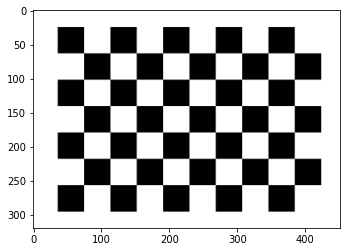

In [46]:
plt.imshow(image,cmap='gray')

# Detection de points avec le detecteur MORAVEC

Définition de paramètres

In [47]:
# paramétres de MORAVEC
S= 2  # Seuil
F= 3  # Taille de la fenêtre
U= [[1,0],[1,1],[0,1],[-1,1],[-1,0],[-1,-1],[0,-1],[1,-1]]# Déplacements

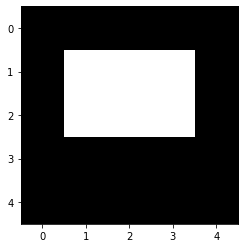

In [48]:
test = np.genfromtxt('mat.csv', delimiter=';')
plt.imshow(test,cmap='gray')

Calcul de la carte de coins (cornerness map)

In [49]:
def getCornernessMap(x,y,image,F,U):
    imageTemp = cv.copyMakeBorder(image,math.ceil(F/2),math.ceil(F/2),math.ceil(F/2),math.ceil(F/2),cv.BORDER_CONSTANT,(0,0,0))
    c = []
    for d in U:
        s = 0
        for a in range(-1,2):
            for b in range(-1,2):
                s += (int(imageTemp[x+d[0]+a][y+d[1]+b])-int(imageTemp[x+a][y+b]))**2
        c.append(int(s))
    return c

Minimum de la carte de coins

In [50]:
def getMapMin(map):
    return min(map)

Appel des fonctions pour calcul de points d'interêt

In [51]:
poi = []
for x in range(image.shape[0]):
    for y in range(image.shape[1]):
        # print(x,y)
        cornernessMap = getCornernessMap(x+2,y+2,image,F,U)
        c = getMapMin(cornernessMap)
        if c >= S:
            poi.append((x,y))
# print(poi)

Affichage de l'image résultante, colorer chaque point d'interêt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


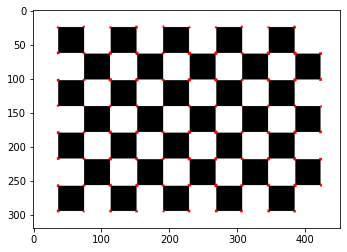

In [52]:
img2=np.zeros((image.shape[0],image.shape[1],3))
img2[:,:,0]=image
img2[:,:,1]=image
img2[:,:,2]=image
for x,y in poi:
    img2[x][y] = [255,0,0]
plt.imshow(img2)

# Descripteurs Harris
D'abord calculer les valeurs et vecteurs propres comme vu en TD, puis appliquer l'agorithme de Harris

In [53]:
A= [[-1,2,0],[0,3,4],[0,0,7]]
B=[[-1,2,2],[2,2,-1],[1,-2,1]]
val1, vec1 = LA.eig(A)
val2, vec2 = LA.eig(A)

In [54]:
print(val1,'\n', vec1,'\n',val2,'\n',vec2)

[-1.  3.  7.] 
 [[1.         0.4472136  0.17407766]
 [0.         0.89442719 0.69631062]
 [0.         0.         0.69631062]] 
 [-1.  3.  7.] 
 [[1.         0.4472136  0.17407766]
 [0.         0.89442719 0.69631062]
 [0.         0.         0.69631062]]


Expliquer le résultat obtenu, et comparer avec le TD;  
Pourquoi les résultats sont-ils différents?

# Reponse:
votre réponse ici ...

# Detection de points avec HARRIS
- appliquer les étapes vues en TD
- pour chaque point (x,y) de l'image, determiner si c'est un point d'interêt ou pas en prennant une fenêtre 3x3 entourant x,y

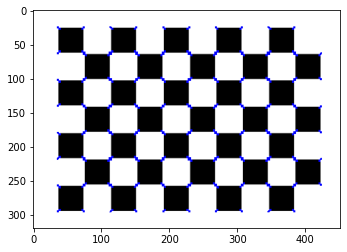

In [55]:
def find_harris_corners(input_img, k, window_size, threshold):
    corner_list = []
    output_img = cv.cvtColor(input_img.copy(), cv.COLOR_GRAY2RGB)
    
    offset = int(window_size/2)
    y_range = input_img.shape[0] - offset
    x_range = input_img.shape[1] - offset

    dy, dx = np.gradient(input_img)
    Ixx = dx**2
    Ixy = dy*dx
    Iyy = dy**2

    for y in range(offset, y_range):
        for x in range(offset, x_range):
            start_y = y - offset
            end_y = y + offset + 1
            start_x = x - offset
            end_x = x + offset + 1
            
            windowIxx = Ixx[start_y : end_y, start_x : end_x]
            windowIxy = Ixy[start_y : end_y, start_x : end_x]
            windowIyy = Iyy[start_y : end_y, start_x : end_x]
            
            Sxx = windowIxx.sum()
            Sxy = windowIxy.sum()
            Syy = windowIyy.sum()

            det = (Sxx * Syy) - (Sxy**2)
            trace = Sxx + Syy
            
            r = det - k*(trace**2)

            if r > threshold:
                corner_list.append([x, y, r])
                output_img[y,x] = (0,0,255)

    return corner_list, output_img

img=image.copy()
_,dst = find_harris_corners(img,0.04,5,0)
dst = cv.dilate(dst,None)
plt.imshow(dst)


comparer avec opencv

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]


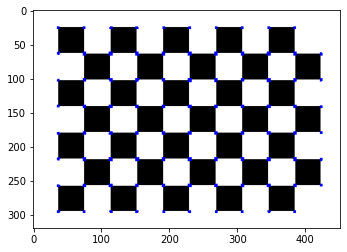

In [56]:
img=image.copy()
# Detecter les points avec Harris
dst = cv.cornerHarris(img,2,3,0.04)
# Dilater l'image pour mieux visualiser les points de coins
dst = cv.dilate(dst,None)
# Créer une image RVB
img2=np.zeros((img.shape[0],img.shape[1],3))
img2[:,:,0]=img
img2[:,:,1]=img
img2[:,:,2]=img
# Dessiner les points sur l'image RVB
img2[dst>0.01*dst.max()]=[0,0,255]
print(img2)
plt.imshow(img2)

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 10 Decembre 2021 à 23:00


In [57]:
# bonne chance